In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

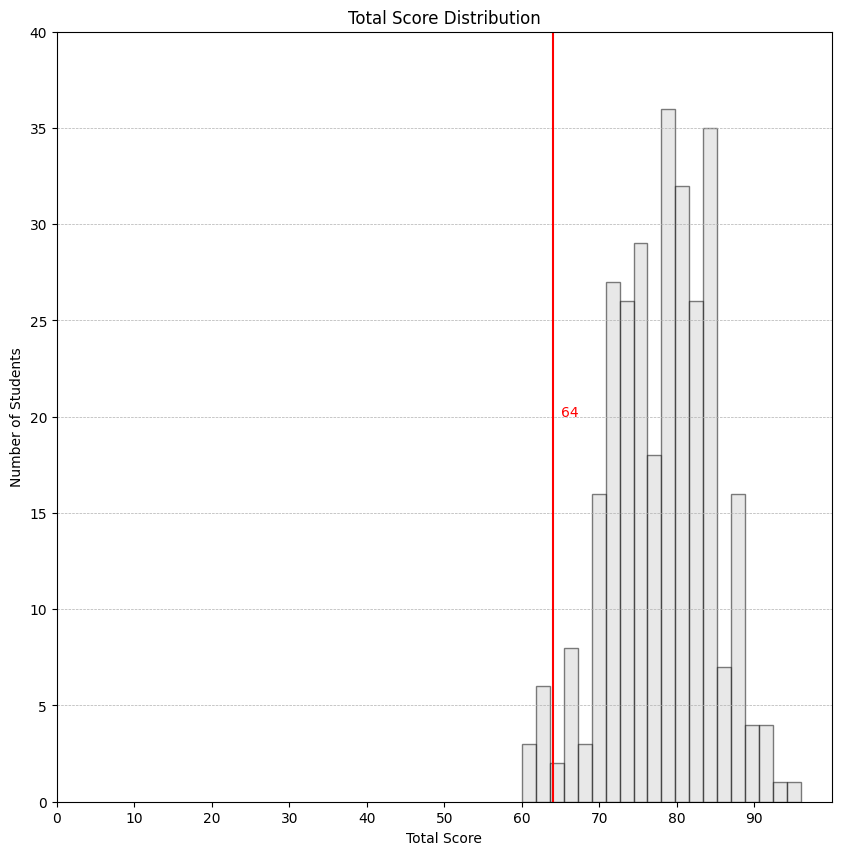

<Figure size 640x480 with 0 Axes>

In [10]:
# ---
# Group No. 12
# 1. ภูผา ยอดคีรี 6210450270
# 2. ณัฐนันท์ อุ่นเเจ่ม 6410450010
# 3. สุรเดช เพชรพิเศษศรี 6410450621
# 4. เขมรัตน์ บุณยชาต 6410450362
# ---

group = 12 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 3 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

data['Total'] =  np.ceil((0.25*data['HW1'])+(0.25*data['HW2'])+(0.5*data['Final'])) # คำนวณหา total score ของแต่ละนักเรียนคน
cutoff = np.floor(data['Total'].mean()-(2*data['Total'].std())) # คำนวณหาจุดตัดเกรด
data['Grade'] = np.where(data['Total'] >= cutoff, 'S', 'U') # ตัดเกรดของนักเรียนแต่ละคน
data = data.sort_values(by='Total', ascending=False) # เรียงลำดับจากคนที่ได้คะแนนมากที่สุดไปน้อยที่สุด

plt.figure(figsize=(10, 10)) # ปรับขนาดกราฟ
hist = plt.hist(data['Total'],bins=20 , color='lightgray', edgecolor='black', alpha=0.5) # พล็อต histogram
plt.xlim(0, 100) # ตั้งลิมิตของ x จาก 0 ถึง 100
plt.xticks(np.arange(0, 100, 10))
ylim = (int(max(hist[0])/5)+1)*5 # ตั้งลิมิตของ y
plt.yticks(np.arange(0, ylim+1, 5)) # ปรับให้ y tick ห่างกัน 5 หน่วย
plt.axvline(x=cutoff, color='red', label=f'{cutoff}') # สร้างเส้นตัดแกนตั้งตรงจุดตัดเกรด
plt.text(cutoff+1, ylim/2, f'{int(cutoff)}', color='red') # แสดงค่าของจุดตัดเกรดข้างๆแกนตั้ง
plt.grid(axis='y', linestyle='--', linewidth=0.5) # สร้าง gridline ในแกน y
plt.title('Total Score Distribution') # ชื่อกราฟ
plt.xlabel('Total Score') # ชื่อแกน x
plt.ylabel('Number of Students') # ชื่อแกน y
plt.show()

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()